replace coco/val2017/000000212226.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
replace coco/annotations/instances_train2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
loading annotations into memory...
Done (t=0.66s)
creating index...
index created!


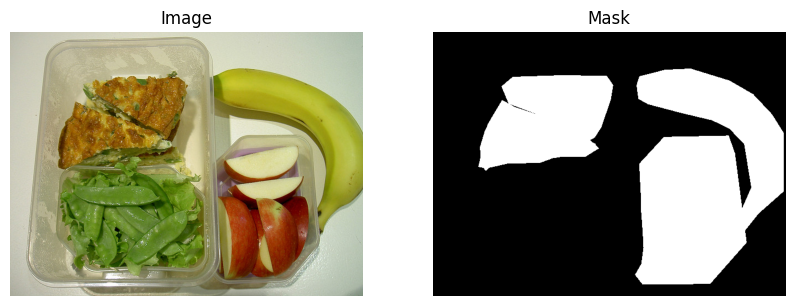

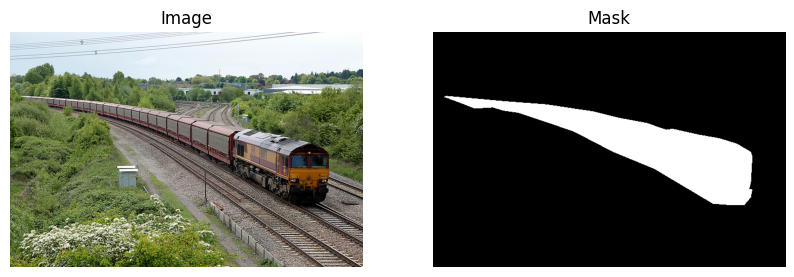

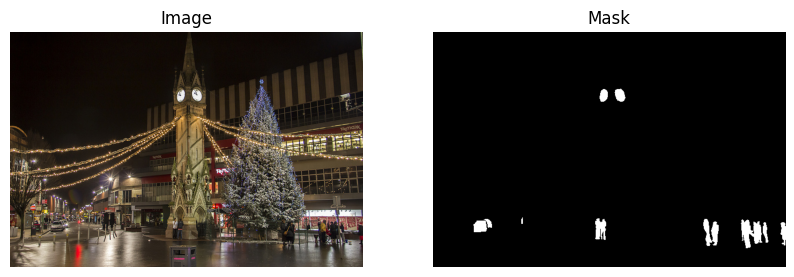

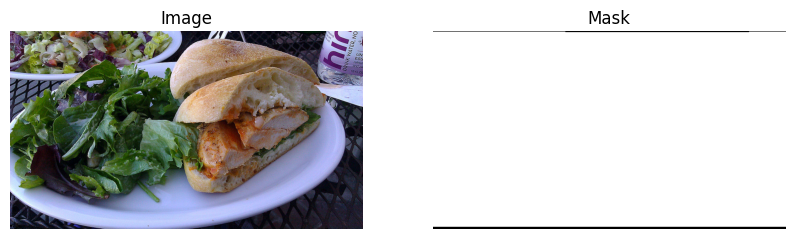

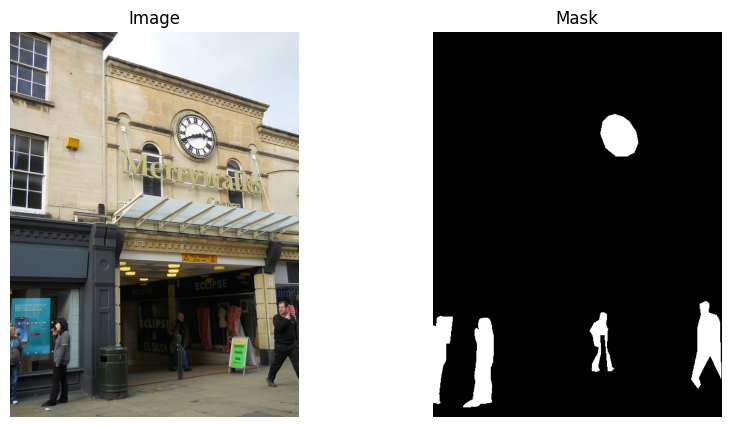

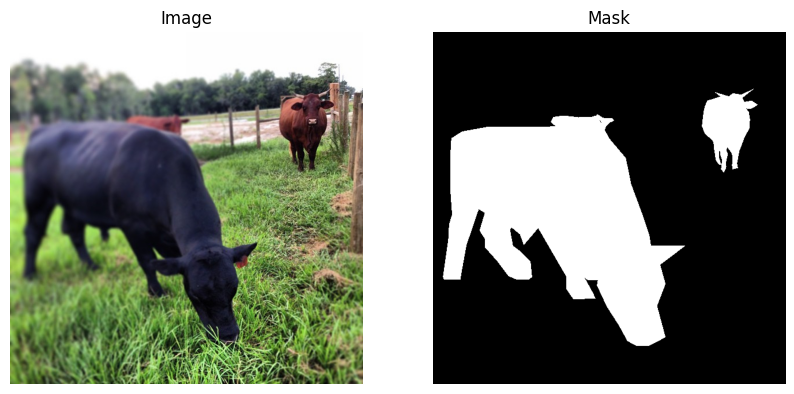

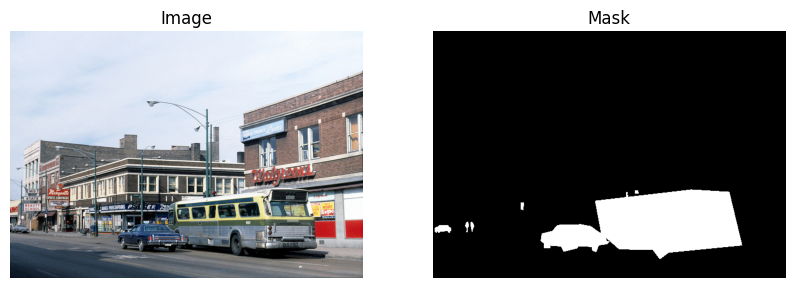

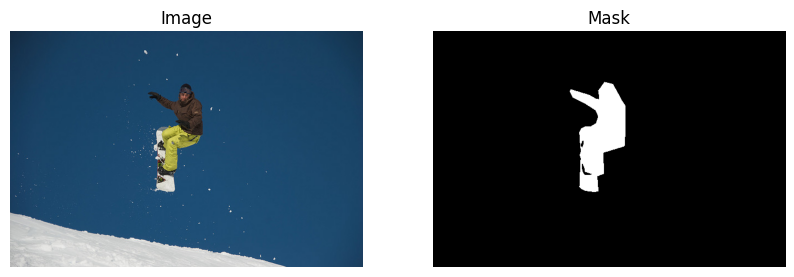

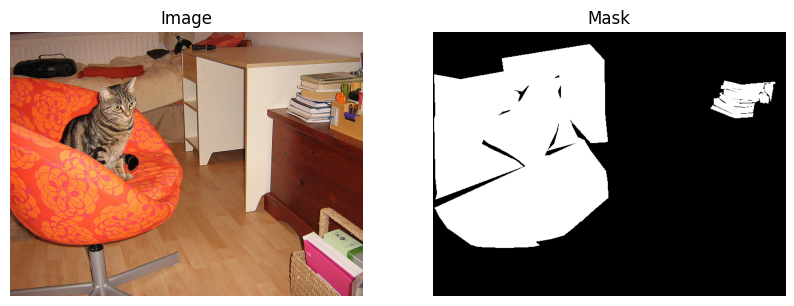

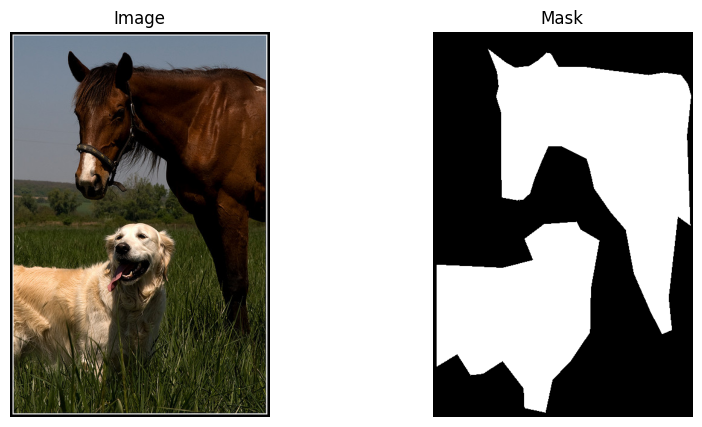

In [6]:
!pip install pycocotools opencv-python matplotlib

# --- Download validation images ---
!mkdir -p coco
!wget -q http://images.cocodataset.org/zips/val2017.zip -P coco/
!unzip -q coco/val2017.zip -d coco/

# --- Download validation annotations ---
!wget -q http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P coco/
!unzip -q coco/annotations_trainval2017.zip -d coco/

# --- Python code to show first 10 image-mask pairs ---
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import random

# Correct paths
img_dir = "/content/coco/val2017"
ann_file = "/content/coco/annotations/instances_val2017.json"

# Load COCO API
coco = COCO(ann_file)
img_ids = coco.getImgIds()

# Pick 10 random image IDs each time
sample_ids = random.sample(img_ids, 10)


for img_id in sample_ids:
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(img_dir, img_info['file_name'])

    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Load annotations and create mask
    ann_ids = coco.getAnnIds(imgIds=img_info['id'])
    anns = coco.loadAnns(ann_ids)

    mask = np.zeros((img_info['height'], img_info['width']), dtype=np.uint8)
    for ann in anns:
        mask = np.maximum(mask, coco.annToMask(ann) * 255)

    # Plot image + mask
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img)
    axs[0].set_title("Image")
    axs[0].axis("off")

    axs[1].imshow(mask, cmap="gray")
    axs[1].set_title("Mask")
    axs[1].axis("off")

    plt.show()
